In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Cleaning data

In [2]:
lead_df = pd.read_csv("Leads.csv") # Importing Dataset

In [3]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead_df.shape # Checking shape of data

(9240, 37)

In [6]:
lead_df.info() # Checking null values and datatypes of variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
lead_df.describe() # Describing the data in order to get idea about numberic values

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

#### We can observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.

In [8]:
lead_df = lead_df.replace('Select', np.nan) # Convereted 'Select' value to 'NaN'

In [9]:
lead_df.isnull().sum() # Checking for Null values

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
round(lead_df.isnull().sum()/len(lead_df.index),2)*100 # Checking null percentage

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

##### We can see that are many null columns who is greater tahn 40% hence dropping the column who have null values more than 40%.

In [11]:
lead_df=lead_df.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [12]:
round(lead_df.isnull().sum()/len(lead_df.index),2)*100 # Checking null percentage

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

#### Specialization column has 37% null values

In [19]:
# Creating a separate category called 'Others' for this
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Others') 

In [21]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
lead_df['Tags']=lead_df['Tags'].replace(np.nan,'Will revert after reading the email')

In [25]:
# Finding the percentage of the different categories of this column:
round(lead_df['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [26]:
# Dropping this column 
lead_df=lead_df.drop('What matters most to you in choosing a course',axis=1)

In [30]:
# Finding the percentage of the different categories of this column:
round(lead_df['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

###### Since the most values are 'Unemployed' , we can impute missing values in this column with this value.

In [31]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [32]:
# Imputing the missing data in the 'Country' column with 'India'
lead_df['Country']=lead_df['Country'].replace(np.nan,'India')

In [34]:
# Finding the percentage of the different categories of this column:
round(lead_df['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

##### Since most values are 'Mumbai' , we can impute missing values in this column with this value.

In [35]:
# Imputing the missing data in the 'City' column with 'Mumbai'
lead_df['City']=lead_df['City'].replace(np.nan,'Mumbai')

In [36]:
# Finding the null percentages across columns after removing the above columns
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [37]:
# Dropping the rows with null values
lead_df.dropna(inplace = True)

In [38]:
# Finding the null percentages across columns after removing the above columns
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

#### Now we don't have any missing value in the dataset.

#### We can find the percentage of rows retained.

In [39]:
# Percentage of rows retained 
(len(lead_df.index)/9240)*100

98.2034632034632

#### We have retained 98% of the rows after cleaning the data .

## Exploratory Data Analysis

In [40]:
lead_df[lead_df.duplicated()] # Checking for duplicates

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


## Univariate and Bivariate Analysis

#### Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [41]:
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.85541106458012

#### Lead conversion rate is 38%

### Lead Origin

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

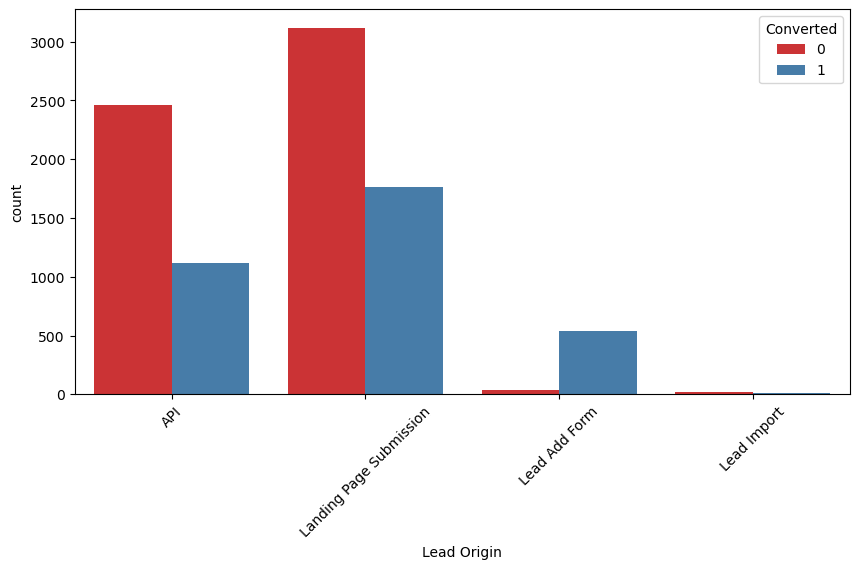

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 45)

### Inference :
- API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
- Lead Add Form has more than 90% conversion rate but count of lead are not very high.
- Lead Import are very less in count.

#### To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

### Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

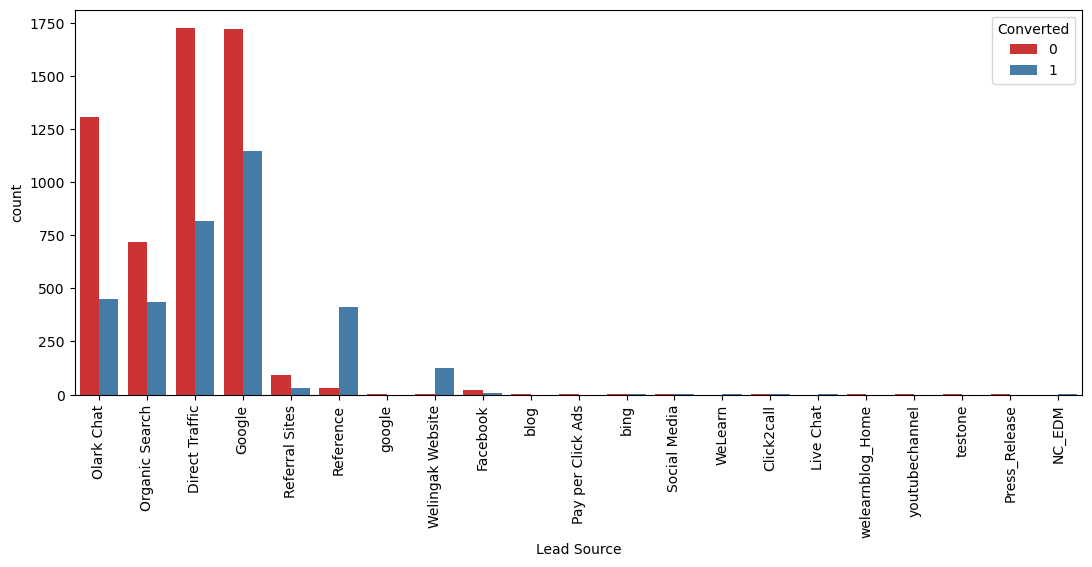

In [43]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df, palette='Set1')
plt.xticks(rotation = 90)

In [45]:
# Need to replace 'google' with 'Google'
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['google'], 'Google')

In [46]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

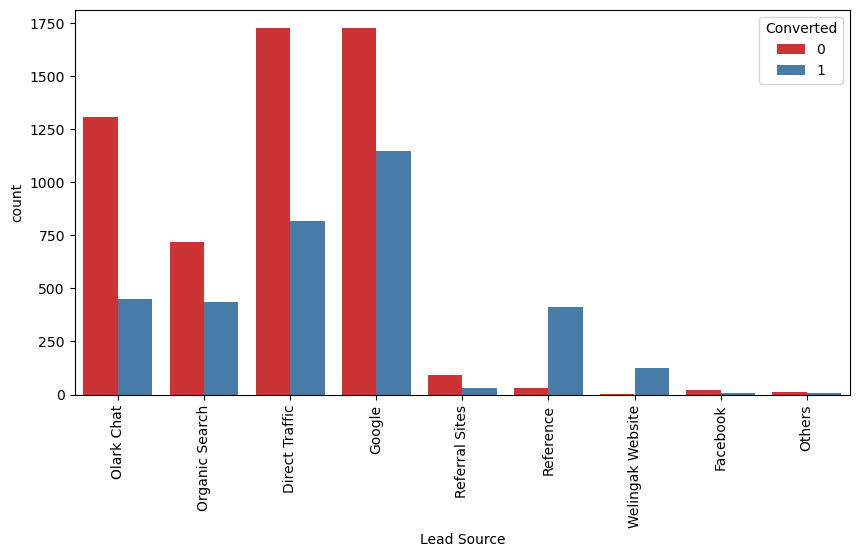

In [48]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

## Inference
- Google and Direct traffic generates maximum number of leads.
- Conversion Rate of reference leads and leads through welingak website is high.

#### To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

### Do not Email


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

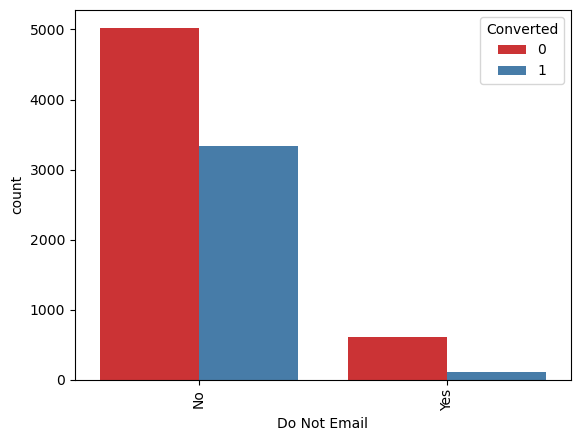

In [49]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

#### Inference
- Most entries are 'No'. No Inference can be drawn with this parameter.

### Do not Call

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

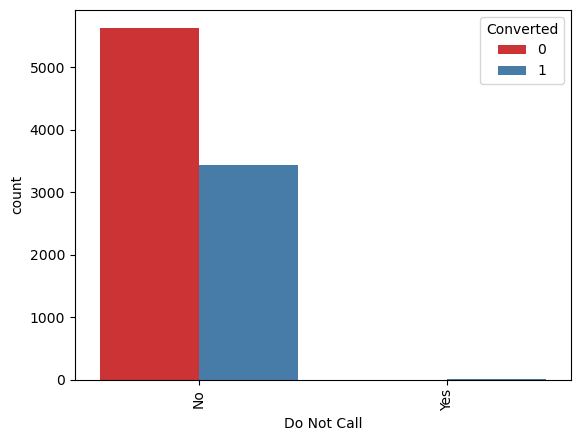

In [50]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

#### Inference
- Most entries are 'No'. No Inference can be drawn with this parameter.

### Total Visit

In [51]:
lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: >

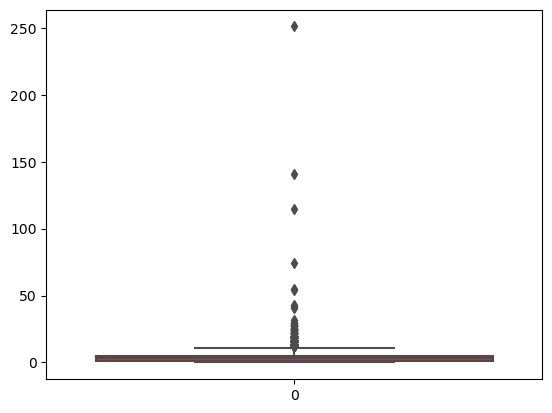

In [52]:
sns.boxplot(lead_df['TotalVisits'],orient='vert',palette='Set1')

##### As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [53]:
percentiles = lead_df['TotalVisits'].quantile([0.05,0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_df['TotalVisits'][lead_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: >

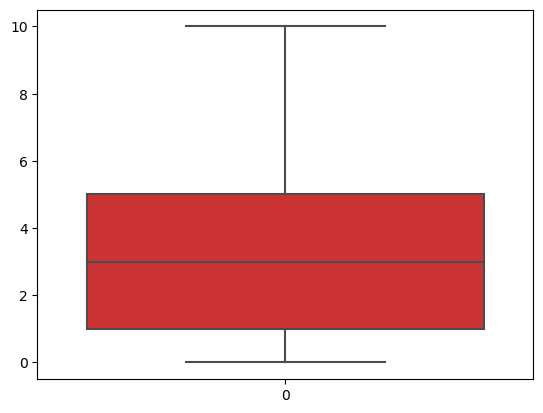

In [54]:
# Visualizing again
sns.boxplot(lead_df['TotalVisits'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

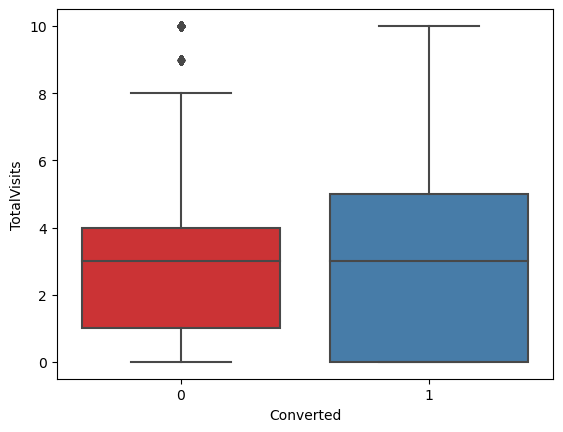

In [55]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df,palette='Set1')

#### Inference
- Median for converted and not converted leads are the same.

Nothing can be concluded on the basis of Total Visits.

### Total Time spent on website

In [56]:
lead_df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: >

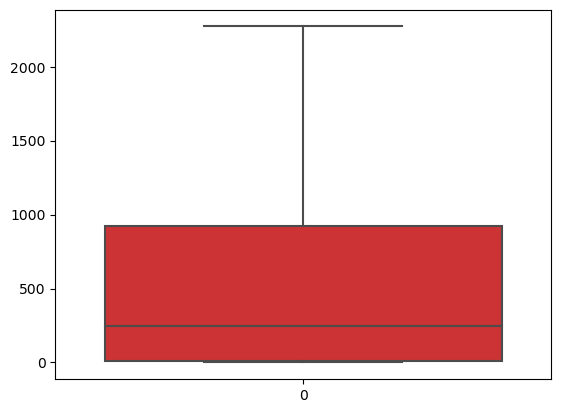

In [57]:
sns.boxplot(lead_df['Total Time Spent on Website'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

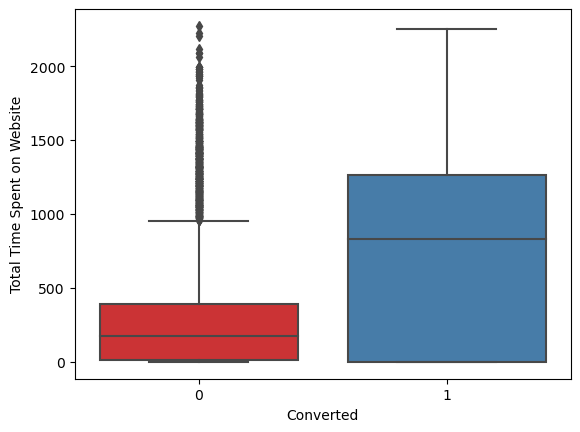

In [58]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df,palette='Set1')

#### Inference
- Leads spending more time on the weblise are more likely to be converted.

Website should be made more engaging to make leads spend more time.

### Page Views Per Visit

In [59]:
lead_df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: >

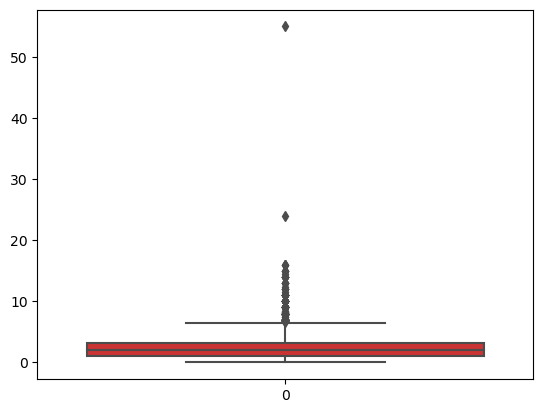

In [60]:
sns.boxplot(lead_df['Page Views Per Visit'],orient='vert',palette='Set1')

#### As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [61]:
percentiles = lead_df['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: >

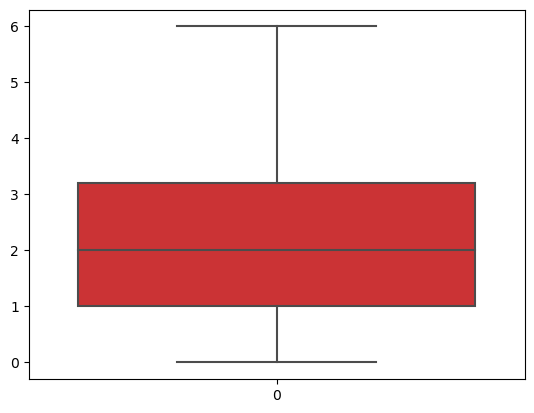

In [62]:
# Visualizing again
sns.boxplot(lead_df['Page Views Per Visit'],palette='Set1',orient='vert')

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

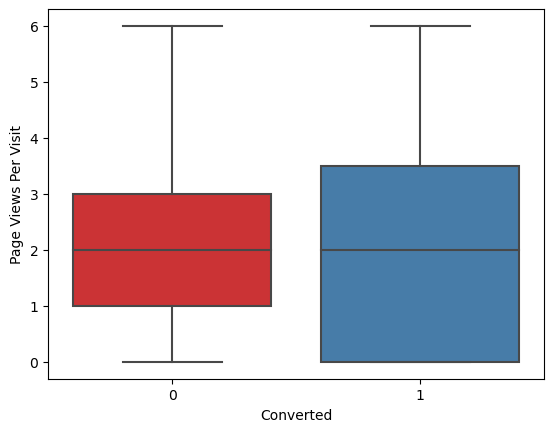

In [63]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_df,palette='Set1')

### Last Activity

In [64]:
lead_df['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

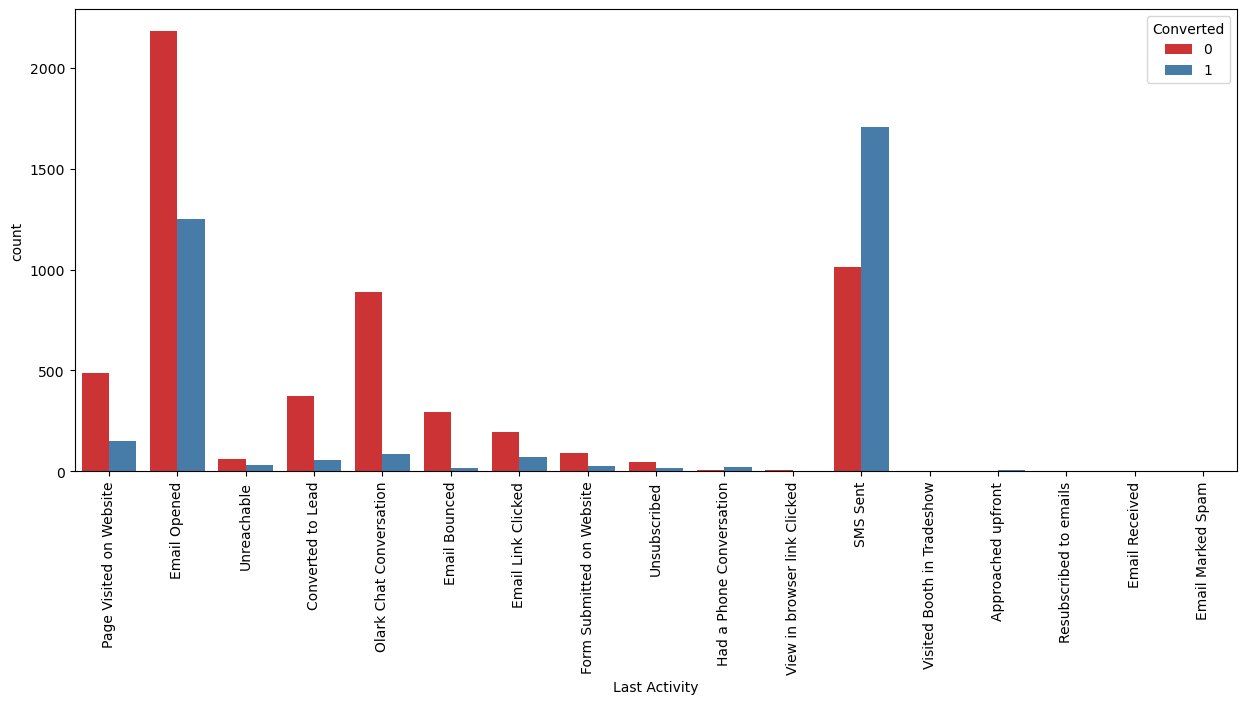

In [65]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

In [67]:
# We can club the last activities to "Other_Activity" which are having less data.
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

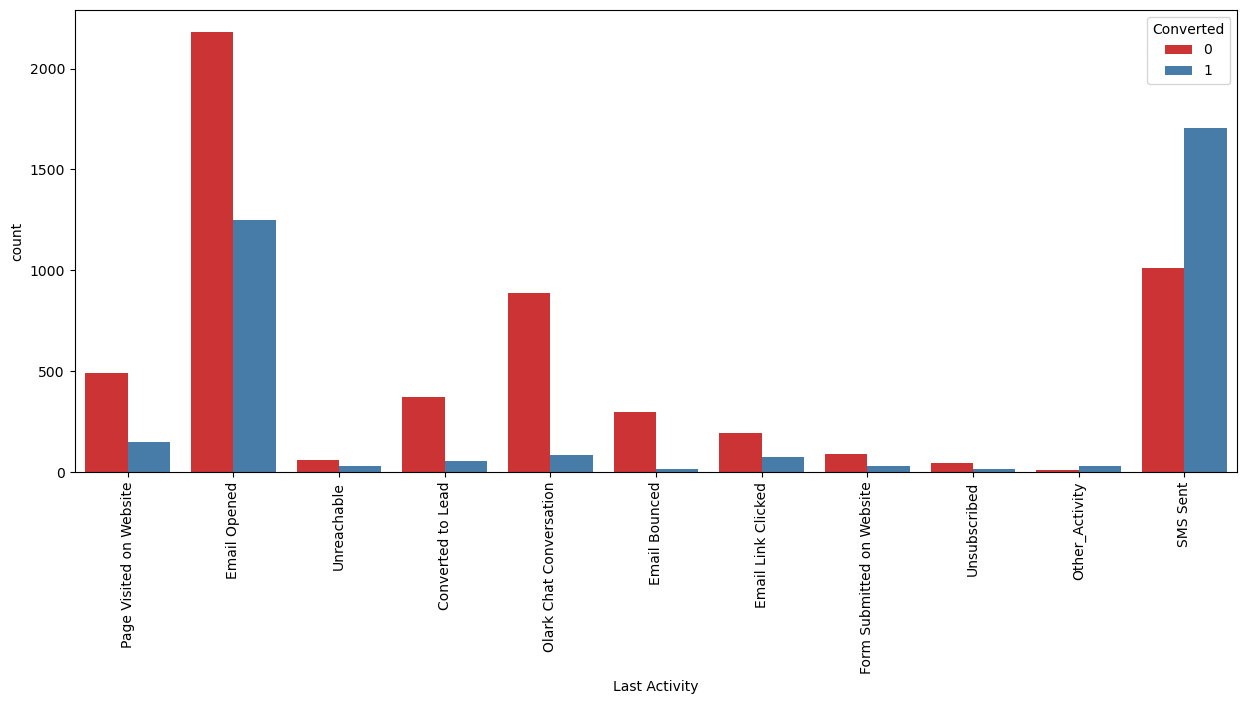

In [69]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

#### Inference
- Most of the lead have their Email opened as their last activity.
- Conversion rate for leads with last activity as SMS Sent is almost 60%.

### Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

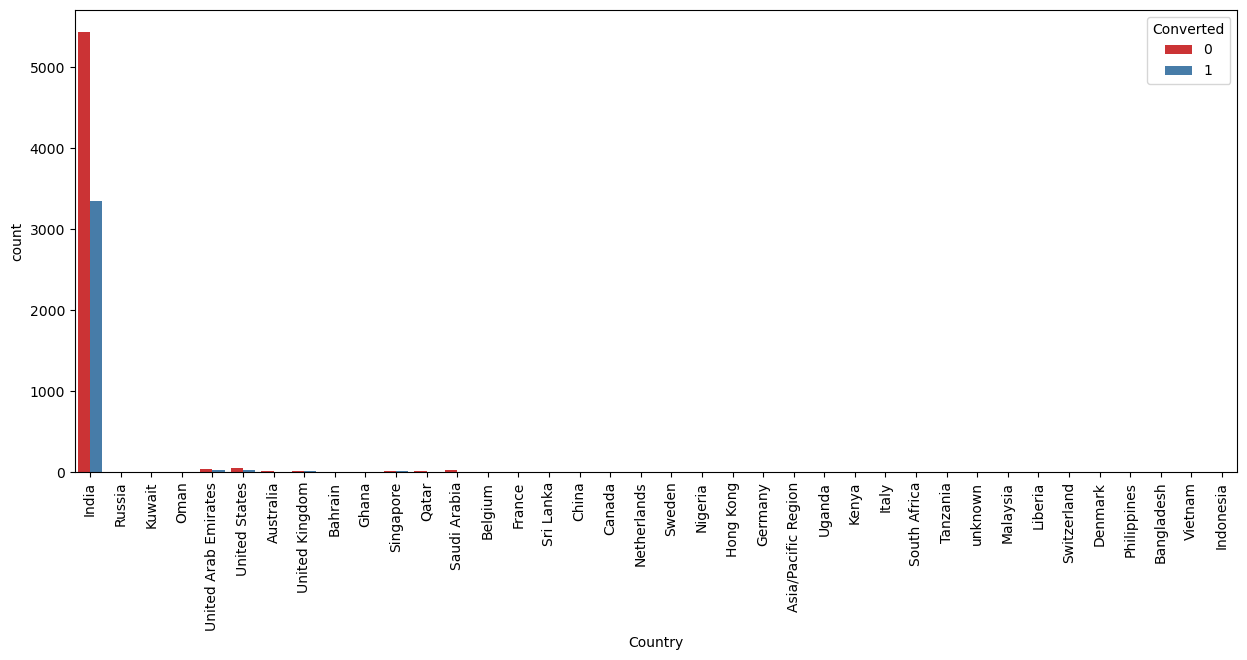

In [70]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

### Inference
- Most values are 'India' no such inference can be drawn

### Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

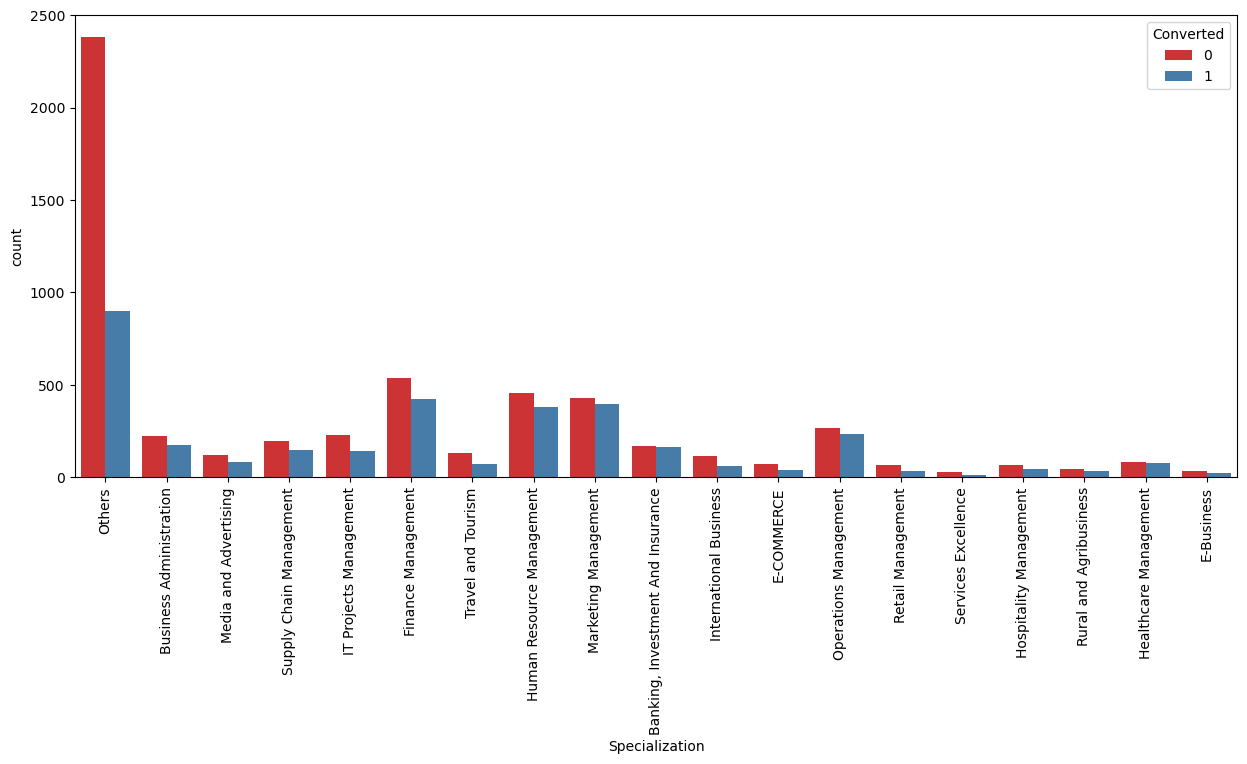

In [72]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

#### Inference
- Focus should be more on the Specialization with high conversion rate.

### Current Occupation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

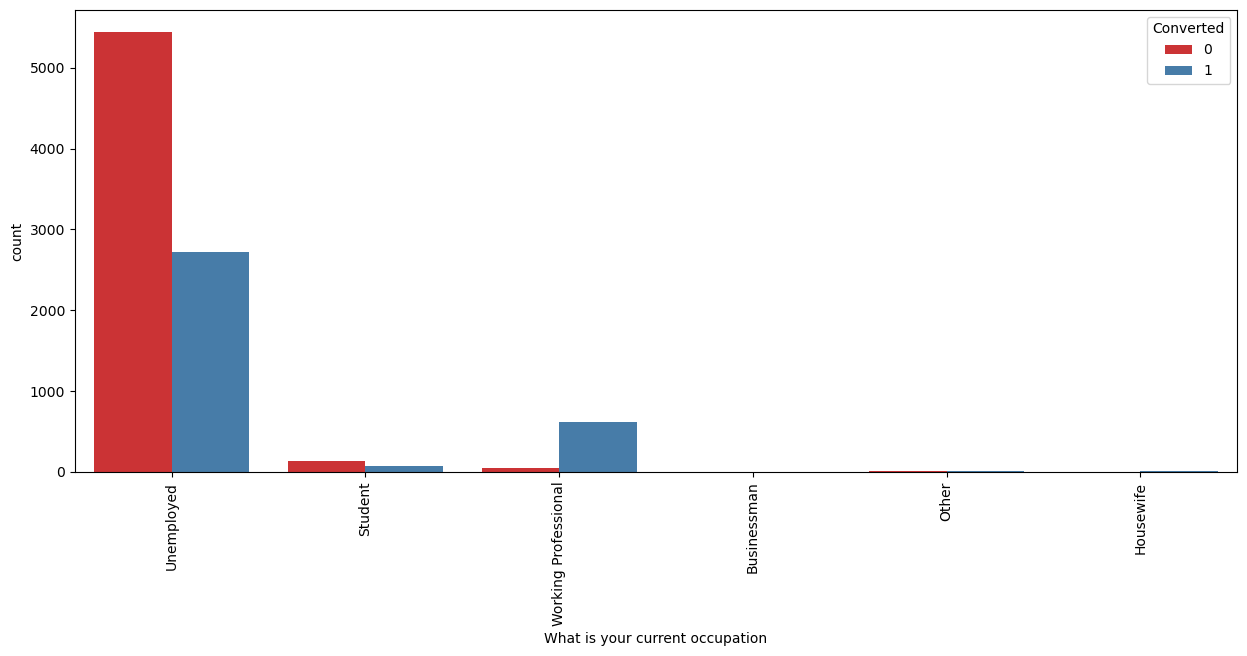

In [74]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

#### Inference
- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in numbers but has around 30-35% conversion rate.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

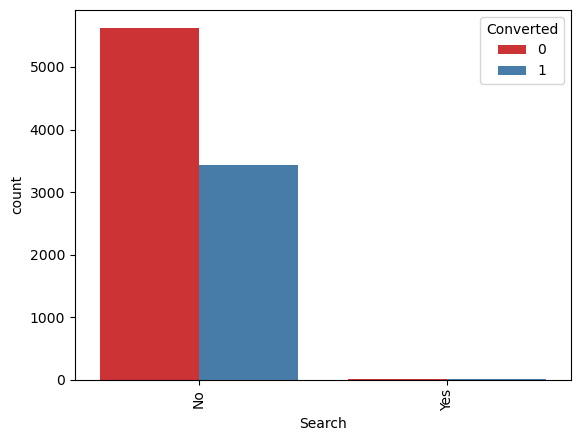

In [76]:
sns.countplot(x = "Search", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

### Magazine

(array([0]), [Text(0, 0, 'No')])

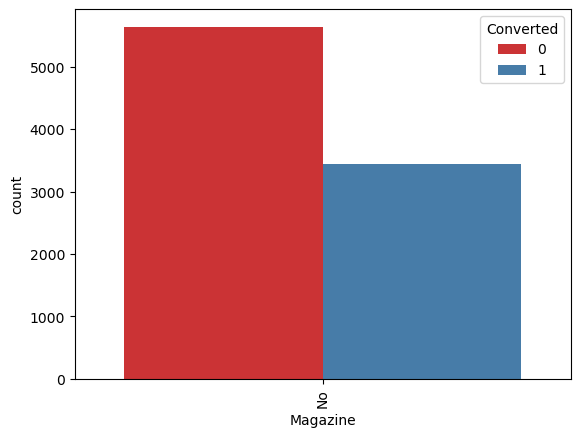

In [77]:
sns.countplot(x = "Magazine", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

### Newspaper Article

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

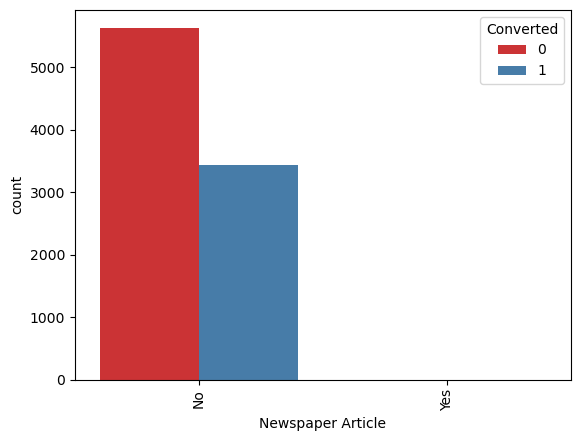

In [78]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

### X Education Forum 

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

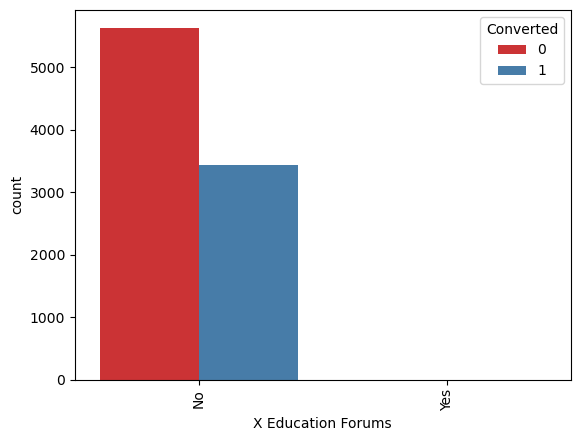

In [79]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

### Newspaper

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

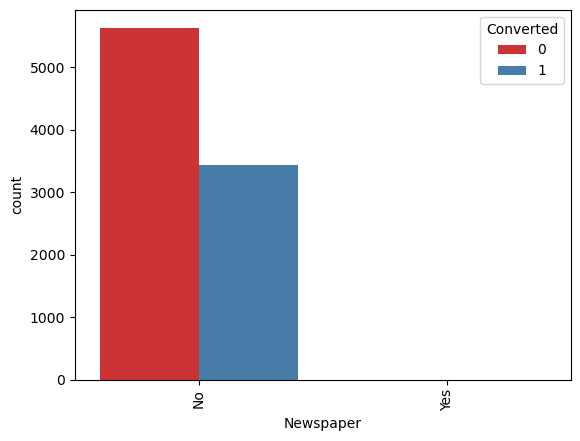

In [80]:
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

### Digital Advertisement

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

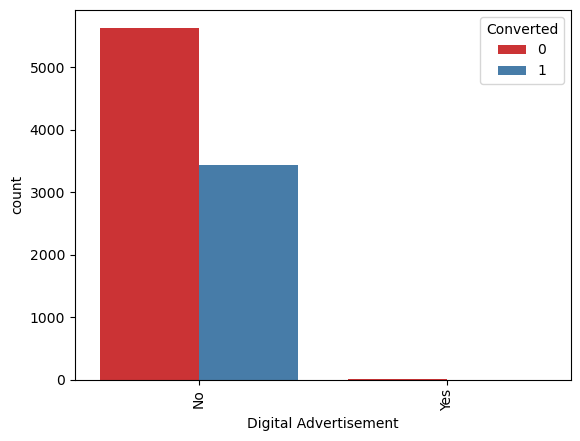

In [81]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

### Through Recomendation

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

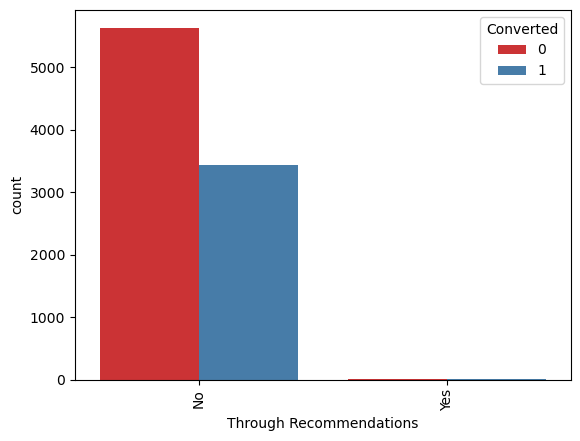

In [82]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

### Receive More Updates About Our Course

(array([0]), [Text(0, 0, 'No')])

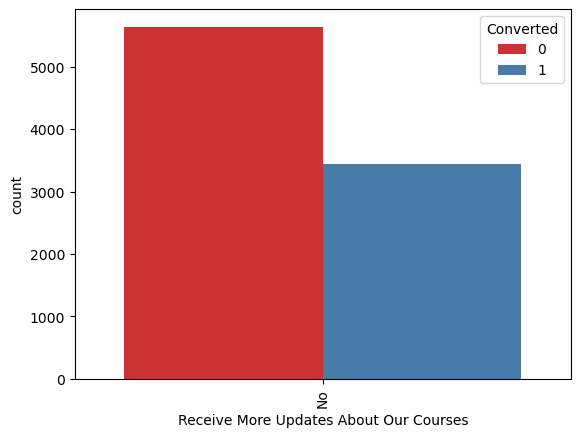

In [83]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

### Tags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

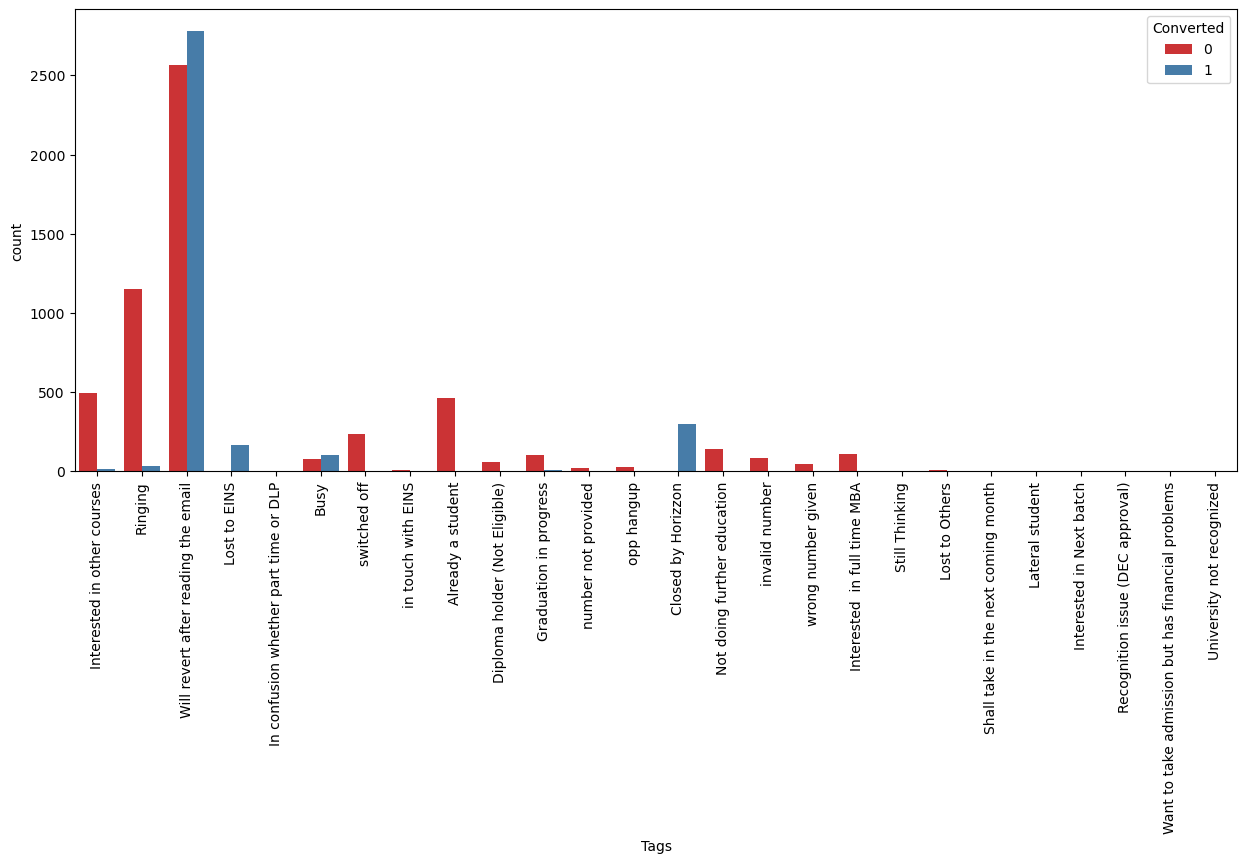

In [84]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

#### Inference
- Since this is a column which is generated by the sales team for their analysis , so this is not available for model building.
- So we will need to remove this column before building the model.

### Update me on Supply Chain Content

(array([0]), [Text(0, 0, 'No')])

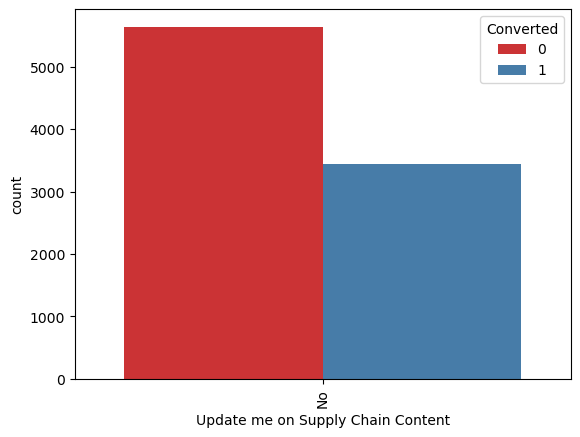

In [85]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

(array([0]), [Text(0, 0, 'No')])

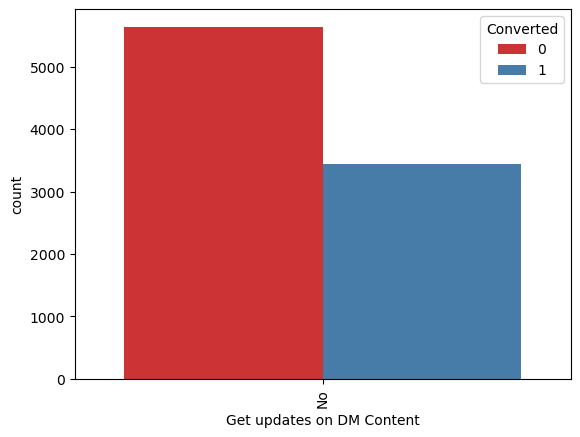

In [86]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

### City

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

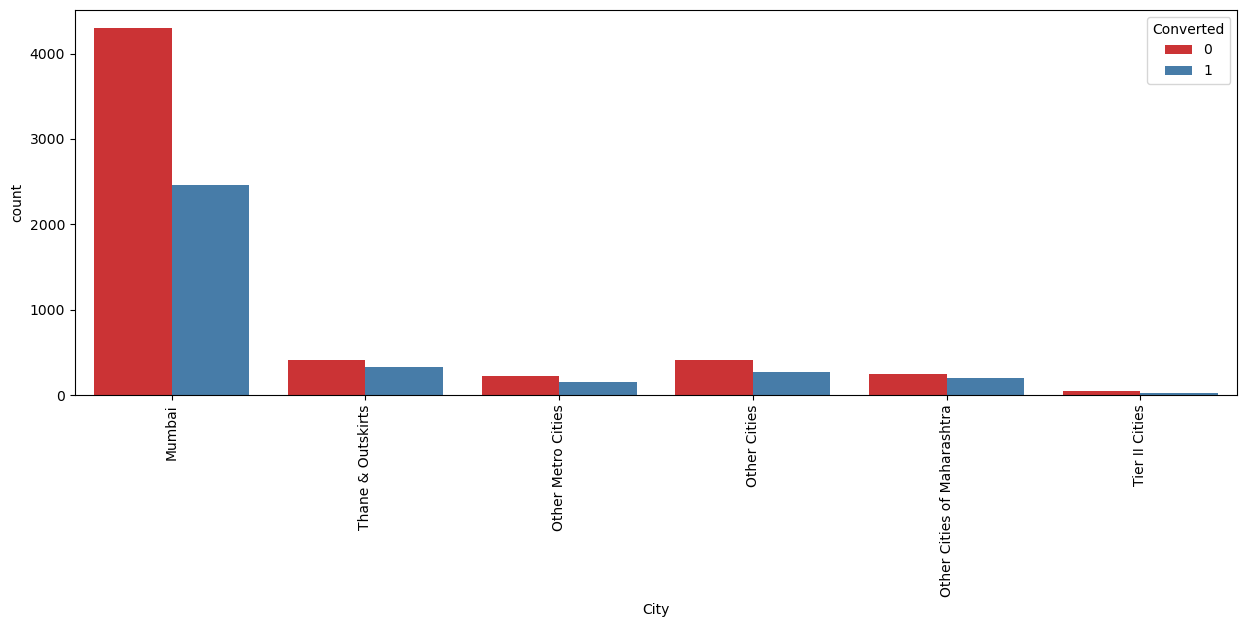

In [87]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

#### Inference
- Most leads are from mumbai with around 50% conversion rate.

###  I agree to pay the amount through cheque

(array([0]), [Text(0, 0, 'No')])

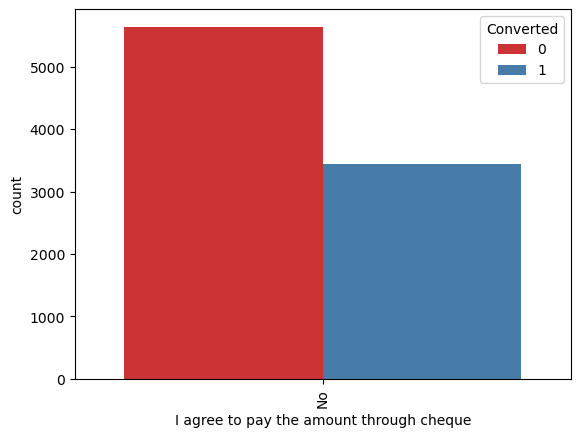

In [88]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

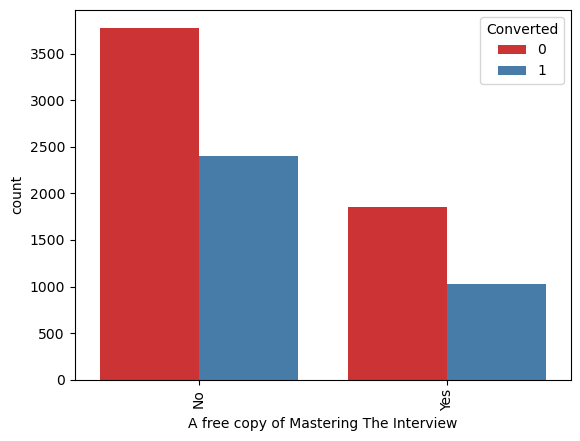

In [89]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

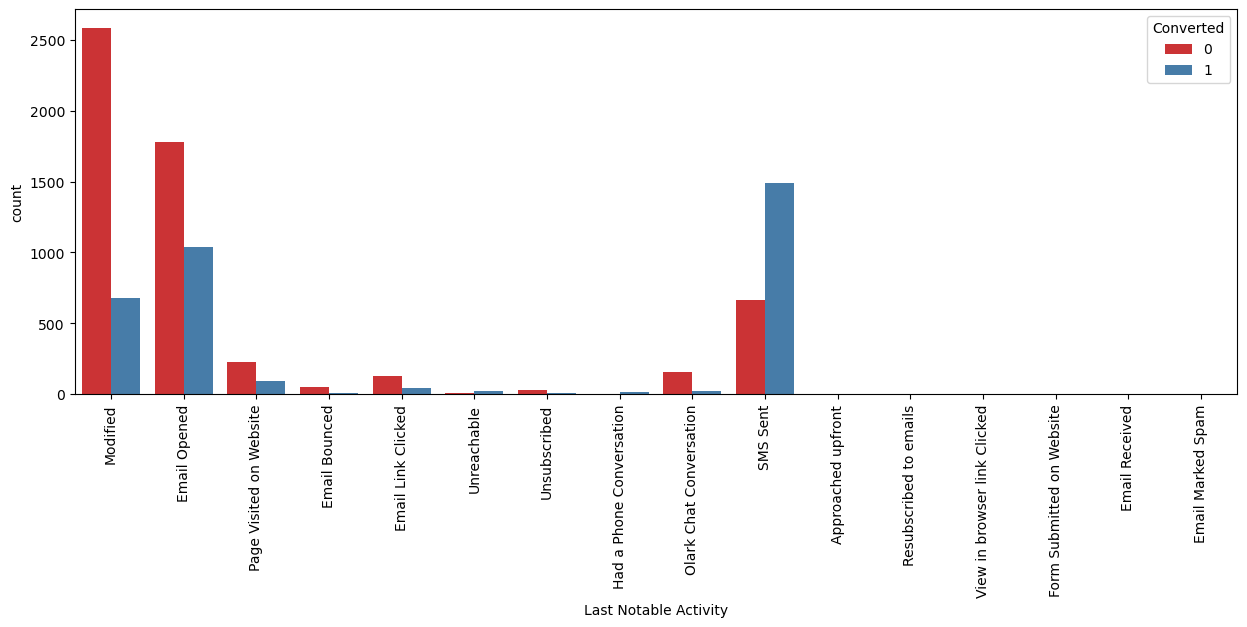

In [90]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_df,palette='Set1')
plt.xticks(rotation = 90)

#### Results
- Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [91]:
lead_df = lead_df.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [92]:
lead_df.shape

(9074, 14)

In [93]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

## Data Preparation

### Converting binary variable (Yes/No) to 1/0

In [94]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_df[vars] = lead_df[vars].apply(binary_map)

### Creating Dummy variables for the categorical features:
#### 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'

In [95]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_df = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [97]:
# Concatenating the dummy_data to the lead_data dataframe
lead_df = pd.concat([lead_df, dummy_df], axis=1)
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


#### Dropping the columns for which dummies were created

In [98]:
lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [99]:
lead_df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


###  Splitting the data into train and test set.

In [100]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_df.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [101]:
# Putting target variable to y
y = lead_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [102]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Scaling the feature

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [104]:
# Checking the Lead Conversion rate
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.85541106458012

#### We have almost 38% lead conversion rate.

### Feature Selection Using RFE

In [109]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [110]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True])

In [111]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 10),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Others', False, 14),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 5),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 21),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Ac

In [112]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity

### Model Building

#### Assessing the model with StatsModels

#### Model 1

In [113]:
import statsmodels.api as sm

In [114]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.3
Date:                Sat, 17 Feb 2024   Deviance:                       5130.6
Time:                        23:00:30   Pearson chi2:                 6.41e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4086
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1483      0.832      1.381      0.167      -0.482       2.778
Do Not Email                                            -1.6505      0.210     -7.861      0.000      -2.062      -1.239
Do Not Call                                             21.6148    3.3e+04      0.001      0.999   -6.47e+04    6.47e+04
Total Time Spent on Website                              1.1092      0.041     26.969      0.000       1.029       1.190
Lead Origin_Landing Page Submission                     -1.1167      0.131     -8.544      0.000      -1.373      -0.861
Lead Origin_Lead Add Form                                1.4799      0.894      1.656      0.098      -0.272       3.232
Lead Origin_Lead Import                                  0.9064      0.477      1.901      0.057      -0.028       1.841
Lead Source_Olark Chat                                   1.1015      0.125      8.838      0.000       0.857       1.346
Lead Source_Reference                                    1.8434      0.918      2.009      0.045       0.045       3.642
Lead Source_Welingak Website                             4.4143      1.150      3.839      0.000       2.160       6.668
Last Activity_Email Link Clicked                         0.6824      0.411      1.659      0.097      -0.124       1.489
Last Activity_Email Opened                               0.8894      0.216      4.118      0.000       0.466       1.313
Last Activity_Olark Chat Conversation                   -0.3945      0.253     -1.562      0.118      -0.890       0.100
Last Activity_Other_Activity                             2.3997      0.596      4.024      0.000       1.231       3.568
Last Activity_Page Visited on Website                    0.5763      0.265      2.178      0.029       0.058       1.095
Last Activity_SMS Sent                                   1.3409      0.218      6.159      0.000       0.914       1.768
Last Activity_Unreachable                                0.5245      0.521      1.007      0.314      -0.496       1.545
Last Activity_Unsubscribed                               1.6163      1.130      1.431      0.153      -0.598       3.831
Specialization_Hospitality Management                   -0.4183      0.329     -1.271      0.204      -1.063       0.227
Specialization_Others                                   -1.1450      0.127     -9.017      0.000      -1.394      -0.896
What is your current occupation_Housewife               21.7990   1.53e+04      0.001      0.999   -2.99e+04       3e+04
What is your current occupation_Student                 -0.5206      0.678     -0.768      0.442      -1.849       0.808
What is your current occupation_Unemployed              -0

#### Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [115]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

#### Model 2

In [116]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.3
Date:                Sat, 17 Feb 2024   Deviance:                       5134.6
Time:                        23:18:55   Pearson chi2:                 6.42e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4082
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6467      0.795      2.071      0.038       0.089       3.205
Do Not Email                                            -1.6545      0.210     -7.873      0.000      -2.066      -1.243
Do Not Call                                             20.6187      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1081      0.041     26.960      0.000       1.028       1.189
Lead Origin_Landing Page Submission                     -1.1097      0.131     -8.499      0.000      -1.366      -0.854
Lead Origin_Lead Add Form                                1.4833      0.893      1.660      0.097      -0.268       3.234
Lead Origin_Lead Import                                  0.9079      0.477      1.905      0.057      -0.026       1.842
Lead Source_Olark Chat                                   1.1017      0.125      8.839      0.000       0.857       1.346
Lead Source_Reference                                    1.8458      0.917      2.012      0.044       0.048       3.644
Lead Source_Welingak Website                             4.4118      1.150      3.837      0.000       2.158       6.665
Last Activity_Email Link Clicked                         0.6834      0.411      1.662      0.097      -0.123       1.490
Last Activity_Email Opened                               0.8900      0.216      4.123      0.000       0.467       1.313
Last Activity_Olark Chat Conversation                   -0.3959      0.253     -1.567      0.117      -0.891       0.099
Last Activity_Other_Activity                             2.4003      0.596      4.025      0.000       1.232       3.569
Last Activity_Page Visited on Website                    0.5648      0.265      2.135      0.033       0.046       1.083
Last Activity_SMS Sent                                   1.3412      0.218      6.162      0.000       0.915       1.768
Last Activity_Unreachable                                0.5248      0.521      1.007      0.314      -0.496       1.546
Last Activity_Unsubscribed                               1.6188      1.130      1.433      0.152      -0.595       3.833
Specialization_Hospitality Management                   -0.4186      0.329     -1.272      0.203      -1.064       0.226
Specialization_Others                                   -1.1410      0.127     -8.992      0.000      -1.390      -0.892
What is your current occupation_Student                 -1.0214      0.631     -1.619      0.106      -2.258       0.215
What is your current occupation_Unemployed              -1.4671      0.589     -2.490      0.013      -2.622      -0.313
What is your current occupation_Working Professional     1

#### Since Pvalue of 'Last Notable Activity_Had a Phone Conversation' is very high, we can drop this column.

In [117]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

#### Model 3

In [118]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.4
Date:                Sat, 17 Feb 2024   Deviance:                       5134.8
Time:                        23:19:51   Pearson chi2:                 6.42e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4082
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7265      0.766      2.255      0.024       0.226       3.227
Do Not Email                                            -1.6660      0.209     -7.984      0.000      -2.075      -1.257
Do Not Call                                             20.6171      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1079      0.041     26.956      0.000       1.027       1.188
Lead Origin_Landing Page Submission                     -1.1100      0.131     -8.503      0.000      -1.366      -0.854
Lead Origin_Lead Add Form                                1.4827      0.893      1.659      0.097      -0.268       3.234
Lead Origin_Lead Import                                  0.9073      0.477      1.903      0.057      -0.027       1.841
Lead Source_Olark Chat                                   1.1009      0.125      8.833      0.000       0.857       1.345
Lead Source_Reference                                    1.8465      0.917      2.013      0.044       0.049       3.645
Lead Source_Welingak Website                             4.4118      1.150      3.837      0.000       2.158       6.665
Last Activity_Email Link Clicked                         0.6907      0.411      1.680      0.093      -0.115       1.496
Last Activity_Email Opened                               0.8972      0.215      4.164      0.000       0.475       1.320
Last Activity_Olark Chat Conversation                   -0.3880      0.252     -1.538      0.124      -0.882       0.106
Last Activity_Other_Activity                             2.5068      0.538      4.663      0.000       1.453       3.560
Last Activity_Page Visited on Website                    0.5726      0.264      2.167      0.030       0.055       1.090
Last Activity_SMS Sent                                   1.3489      0.217      6.212      0.000       0.923       1.774
Last Activity_Unreachable                                0.5320      0.521      1.022      0.307      -0.489       1.553
Last Activity_Unsubscribed                               1.6329      1.129      1.446      0.148      -0.580       3.846
Specialization_Hospitality Management                   -0.4200      0.329     -1.276      0.202      -1.065       0.225
Specialization_Others                                   -1.1424      0.127     -9.007      0.000      -1.391      -0.894
What is your current occupation_Student                 -1.0220      0.631     -1.619      0.105      -2.259       0.215
What is your current occupation_Unemployed              -1.4677      0.589     -2.491      0.013      -2.623      -0.313
What is your current occupation_Working Professional     1

#### Since Pvalue of 'What is your current occupation_Student' is very high, we can drop this column.

#### Model 4

In [119]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.4
Date:                Sat, 17 Feb 2024   Deviance:                       5134.8
Time:                        23:20:24   Pearson chi2:                 6.42e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4082
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7265      0.766      2.255      0.024       0.226       3.227
Do Not Email                                            -1.6660      0.209     -7.984      0.000      -2.075      -1.257
Do Not Call                                             20.6171      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1079      0.041     26.956      0.000       1.027       1.188
Lead Origin_Landing Page Submission                     -1.1100      0.131     -8.503      0.000      -1.366      -0.854
Lead Origin_Lead Add Form                                1.4827      0.893      1.659      0.097      -0.268       3.234
Lead Origin_Lead Import                                  0.9073      0.477      1.903      0.057      -0.027       1.841
Lead Source_Olark Chat                                   1.1009      0.125      8.833      0.000       0.857       1.345
Lead Source_Reference                                    1.8465      0.917      2.013      0.044       0.049       3.645
Lead Source_Welingak Website                             4.4118      1.150      3.837      0.000       2.158       6.665
Last Activity_Email Link Clicked                         0.6907      0.411      1.680      0.093      -0.115       1.496
Last Activity_Email Opened                               0.8972      0.215      4.164      0.000       0.475       1.320
Last Activity_Olark Chat Conversation                   -0.3880      0.252     -1.538      0.124      -0.882       0.106
Last Activity_Other_Activity                             2.5068      0.538      4.663      0.000       1.453       3.560
Last Activity_Page Visited on Website                    0.5726      0.264      2.167      0.030       0.055       1.090
Last Activity_SMS Sent                                   1.3489      0.217      6.212      0.000       0.923       1.774
Last Activity_Unreachable                                0.5320      0.521      1.022      0.307      -0.489       1.553
Last Activity_Unsubscribed                               1.6329      1.129      1.446      0.148      -0.580       3.846
Specialization_Hospitality Management                   -0.4200      0.329     -1.276      0.202      -1.065       0.225
Specialization_Others                                   -1.1424      0.127     -9.007      0.000      -1.391      -0.894
What is your current occupation_Student                 -1.0220      0.631     -1.619      0.105      -2.259       0.215
What is your current occupation_Unemployed              -1.4677      0.589     -2.491      0.013      -2.623      -0.313
What is your current occupation_Working Professional     1

#### Since Pvalue of 'Lead Origin_Lead Add Form' is very high, we can drop this column.

In [120]:
col1 = col1.drop('Lead Origin_Lead Add Form')

#### Model 5

In [121]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.9
Date:                Sat, 17 Feb 2024   Deviance:                       5137.8
Time:                        23:21:40   Pearson chi2:                 6.42e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4079
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7382      0.766      2.269      0.023       0.237       3.239
Do Not Email                                            -1.6680      0.209     -7.994      0.000      -2.077      -1.259
Do Not Call                                             20.6084      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.1057      0.041     26.947      0.000       1.025       1.186
Lead Origin_Landing Page Submission                     -1.1289      0.130     -8.671      0.000      -1.384      -0.874
Lead Origin_Lead Import                                  0.8906      0.477      1.868      0.062      -0.044       1.825
Lead Source_Olark Chat                                   1.0937      0.124      8.794      0.000       0.850       1.337
Lead Source_Reference                                    3.3144      0.244     13.596      0.000       2.837       3.792
Lead Source_Welingak Website                             5.8855      0.731      8.053      0.000       4.453       7.318
Last Activity_Email Link Clicked                         0.6897      0.411      1.678      0.093      -0.116       1.495
Last Activity_Email Opened                               0.9017      0.215      4.186      0.000       0.479       1.324
Last Activity_Olark Chat Conversation                   -0.3906      0.252     -1.549      0.121      -0.885       0.104
Last Activity_Other_Activity                             2.5054      0.537      4.662      0.000       1.452       3.559
Last Activity_Page Visited on Website                    0.5793      0.264      2.197      0.028       0.063       1.096
Last Activity_SMS Sent                                   1.3487      0.217      6.212      0.000       0.923       1.774
Last Activity_Unreachable                                0.5325      0.521      1.023      0.306      -0.488       1.553
Last Activity_Unsubscribed                               1.6342      1.129      1.447      0.148      -0.579       3.847
Specialization_Hospitality Management                   -0.4213      0.329     -1.280      0.200      -1.066       0.224
Specialization_Others                                   -1.1550      0.127     -9.116      0.000      -1.403      -0.907
What is your current occupation_Student                 -1.0167      0.631     -1.611      0.107      -2.254       0.221
What is your current occupation_Unemployed              -1.4602      0.589     -2.478      0.013      -2.615      -0.305
What is your current occupation_Working Professional     1.1740      0.618      1.899      0.058      -0.037       2.385
City_Tier II Cities                                     -0

#### Checking for VIF values:

In [122]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,What is your current occupation_Unemployed,85.88
23,Last Notable Activity_Email Opened,34.04
24,Last Notable Activity_Modified,33.47
27,Last Notable Activity_SMS Sent,27.82
9,Last Activity_Email Opened,10.69
13,Last Activity_SMS Sent,8.81
20,What is your current occupation_Working Profes...,8.01
3,Lead Origin_Landing Page Submission,7.30
26,Last Notable Activity_Page Visited on Website,5.22
17,Specialization_Others,4.66


In [123]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
col1 = col1.drop('What is your current occupation_Unemployed')

#### Model 6

In [124]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.2
Date:                Sat, 17 Feb 2024   Deviance:                       5144.5
Time:                        23:23:12   Pearson chi2:                 6.43e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4073
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2911      0.493      0.590      0.555      -0.675       1.257
Do Not Email                                            -1.6583      0.208     -7.958      0.000      -2.067      -1.250
Do Not Call                                             20.5732      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.1068      0.041     26.987      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.1499      0.130     -8.845      0.000      -1.405      -0.895
Lead Origin_Lead Import                                  0.8731      0.477      1.830      0.067      -0.062       1.808
Lead Source_Olark Chat                                   1.0891      0.124      8.763      0.000       0.846       1.333
Lead Source_Reference                                    3.3203      0.244     13.631      0.000       2.843       3.798
Lead Source_Welingak Website                             5.8814      0.731      8.047      0.000       4.449       7.314
Last Activity_Email Link Clicked                         0.6879      0.411      1.672      0.095      -0.119       1.494
Last Activity_Email Opened                               0.9056      0.215      4.204      0.000       0.483       1.328
Last Activity_Olark Chat Conversation                   -0.3795      0.252     -1.507      0.132      -0.873       0.114
Last Activity_Other_Activity                             2.5084      0.537      4.667      0.000       1.455       3.562
Last Activity_Page Visited on Website                    0.6068      0.263      2.304      0.021       0.091       1.123
Last Activity_SMS Sent                                   1.3491      0.217      6.212      0.000       0.923       1.775
Last Activity_Unreachable                                0.5301      0.521      1.017      0.309      -0.491       1.551
Last Activity_Unsubscribed                               1.6270      1.129      1.441      0.150      -0.586       3.840
Specialization_Hospitality Management                   -0.4301      0.329     -1.306      0.191      -1.075       0.215
Specialization_Others                                   -1.1773      0.127     -9.304      0.000      -1.425      -0.929
What is your current occupation_Student                  0.4361      0.233      1.870      0.061      -0.021       0.893
What is your current occupation_Working Professional     2.6257      0.197     13.361      0.000       2.241       3.011
City_Tier II Cities                                     -0.5609      0.458     -1.225      0.221      -1.459       0.337
Last Notable Activity_Email Link Clicked                -1

In [125]:
# Dropping the column  'Lead Origin_Lead Import' because it has high Pvalue
col1 = col1.drop('Lead Origin_Lead Import')

#### Model 7

In [126]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2573.8
Date:                Sat, 17 Feb 2024   Deviance:                       5147.6
Time:                        23:24:44   Pearson chi2:                 6.43e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4070
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3258      0.493      0.661      0.508      -0.640       1.292
Do Not Email                                            -1.6577      0.208     -7.958      0.000      -2.066      -1.249
Do Not Call                                             20.5586      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.0995      0.041     26.990      0.000       1.020       1.179
Lead Origin_Landing Page Submission                     -1.1855      0.129     -9.207      0.000      -1.438      -0.933
Lead Source_Olark Chat                                   1.0632      0.123      8.625      0.000       0.822       1.305
Lead Source_Reference                                    3.2856      0.243     13.532      0.000       2.810       3.761
Lead Source_Welingak Website                             5.8559      0.731      8.015      0.000       4.424       7.288
Last Activity_Email Link Clicked                         0.6883      0.411      1.674      0.094      -0.118       1.494
Last Activity_Email Opened                               0.9127      0.215      4.240      0.000       0.491       1.335
Last Activity_Olark Chat Conversation                   -0.3799      0.252     -1.509      0.131      -0.874       0.114
Last Activity_Other_Activity                             2.5065      0.537      4.668      0.000       1.454       3.559
Last Activity_Page Visited on Website                    0.6079      0.263      2.309      0.021       0.092       1.124
Last Activity_SMS Sent                                   1.3580      0.217      6.258      0.000       0.933       1.783
Last Activity_Unreachable                                0.5312      0.521      1.020      0.308      -0.489       1.552
Last Activity_Unsubscribed                               1.6260      1.128      1.441      0.150      -0.585       3.837
Specialization_Hospitality Management                   -0.4327      0.329     -1.315      0.189      -1.078       0.212
Specialization_Others                                   -1.1993      0.126     -9.491      0.000      -1.447      -0.952
What is your current occupation_Student                  0.4322      0.233      1.854      0.064      -0.025       0.889
What is your current occupation_Working Professional     2.6260      0.196     13.368      0.000       2.241       3.011
City_Tier II Cities                                     -0.5592      0.457     -1.223      0.221      -1.456       0.337
Last Notable Activity_Email Link Clicked                -1.5483      0.664     -2.330      0.020      -2.851      -0.246
Last Notable Activity_Email Opened                      -1

#### Checking for VIF values:

In [127]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,Last Notable Activity_Email Opened,12.61
8,Last Activity_Email Opened,10.60
25,Last Notable Activity_SMS Sent,10.50
12,Last Activity_SMS Sent,8.76
22,Last Notable Activity_Modified,8.34
3,Lead Origin_Landing Page Submission,6.73
16,Specialization_Others,4.39
27,Last Notable Activity_Unsubscribed,3.66
14,Last Activity_Unsubscribed,3.64
20,Last Notable Activity_Email Link Clicked,3.32


In [128]:
# Dropping the column  'Last Activity_Unsubscribed' to reduce the variables
col1 = col1.drop('Last Activity_Unsubscribed')

#### Model 8

In [129]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.5
Date:                Sat, 17 Feb 2024   Deviance:                       5149.1
Time:                        23:25:49   Pearson chi2:                 6.43e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4068
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3151      0.492      0.641      0.522      -0.648       1.279
Do Not Email                                            -1.6401      0.208     -7.899      0.000      -2.047      -1.233
Do Not Call                                             20.5592      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.0989      0.041     26.981      0.000       1.019       1.179
Lead Origin_Landing Page Submission                     -1.1845      0.129     -9.204      0.000      -1.437      -0.932
Lead Source_Olark Chat                                   1.0623      0.123      8.619      0.000       0.821       1.304
Lead Source_Reference                                    3.2853      0.243     13.536      0.000       2.810       3.761
Lead Source_Welingak Website                             5.8520      0.730      8.011      0.000       4.420       7.284
Last Activity_Email Link Clicked                         0.6675      0.410      1.626      0.104      -0.137       1.472
Last Activity_Email Opened                               0.8920      0.214      4.168      0.000       0.473       1.312
Last Activity_Olark Chat Conversation                   -0.4006      0.251     -1.597      0.110      -0.892       0.091
Last Activity_Other_Activity                             2.4946      0.536      4.654      0.000       1.444       3.545
Last Activity_Page Visited on Website                    0.5859      0.262      2.235      0.025       0.072       1.100
Last Activity_SMS Sent                                   1.3362      0.216      6.195      0.000       0.913       1.759
Last Activity_Unreachable                                0.5093      0.520      0.979      0.327      -0.510       1.529
Specialization_Hospitality Management                   -0.4339      0.329     -1.319      0.187      -1.079       0.211
Specialization_Others                                   -1.1987      0.126     -9.491      0.000      -1.446      -0.951
What is your current occupation_Student                  0.4312      0.233      1.851      0.064      -0.025       0.888
What is your current occupation_Working Professional     2.6237      0.196     13.370      0.000       2.239       3.008
City_Tier II Cities                                     -0.5622      0.457     -1.231      0.218      -1.457       0.333
Last Notable Activity_Email Link Clicked                -1.5171      0.663     -2.288      0.022      -2.817      -0.217
Last Notable Activity_Email Opened                      -1.2938      0.510     -2.539      0.011      -2.293      -0.295
Last Notable Activity_Modified                          -1

#### Checking for VIF values:

In [130]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,Last Notable Activity_Email Opened,12.55
8,Last Activity_Email Opened,10.54
24,Last Notable Activity_SMS Sent,10.45
12,Last Activity_SMS Sent,8.71
21,Last Notable Activity_Modified,8.27
3,Lead Origin_Landing Page Submission,6.73
15,Specialization_Others,4.39
19,Last Notable Activity_Email Link Clicked,3.32
7,Last Activity_Email Link Clicked,3.28
9,Last Activity_Olark Chat Conversation,2.95


In [131]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables
col1 = col1.drop('Last Notable Activity_Unreachable')

#### Model 9

In [132]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.8
Date:                Sat, 17 Feb 2024   Deviance:                       5149.7
Time:                        23:27:04   Pearson chi2:                 6.44e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4068
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5218      0.403      1.294      0.196      -0.269       1.312
Do Not Email                                            -1.6707      0.205     -8.144      0.000      -2.073      -1.269
Do Not Call                                             20.5584      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.0989      0.041     26.979      0.000       1.019       1.179
Lead Origin_Landing Page Submission                     -1.1861      0.129     -9.221      0.000      -1.438      -0.934
Lead Source_Olark Chat                                   1.0615      0.123      8.614      0.000       0.820       1.303
Lead Source_Reference                                    3.2847      0.243     13.531      0.000       2.809       3.760
Lead Source_Welingak Website                             5.8495      0.730      8.008      0.000       4.418       7.281
Last Activity_Email Link Clicked                         0.6873      0.410      1.676      0.094      -0.116       1.491
Last Activity_Email Opened                               0.9116      0.213      4.273      0.000       0.493       1.330
Last Activity_Olark Chat Conversation                   -0.3810      0.250     -1.523      0.128      -0.871       0.109
Last Activity_Other_Activity                             2.4461      0.536      4.565      0.000       1.396       3.496
Last Activity_Page Visited on Website                    0.6077      0.261      2.325      0.020       0.095       1.120
Last Activity_SMS Sent                                   1.3576      0.215      6.321      0.000       0.937       1.778
Last Activity_Unreachable                                0.7477      0.399      1.875      0.061      -0.034       1.529
Specialization_Hospitality Management                   -0.4392      0.328     -1.337      0.181      -1.083       0.205
Specialization_Others                                   -1.1991      0.126     -9.498      0.000      -1.447      -0.952
What is your current occupation_Student                  0.4314      0.233      1.851      0.064      -0.025       0.888
What is your current occupation_Working Professional     2.6265      0.196     13.383      0.000       2.242       3.011
City_Tier II Cities                                     -0.5583      0.457     -1.220      0.222      -1.455       0.338
Last Notable Activity_Email Link Clicked                -1.7424      0.591     -2.950      0.003      -2.900      -0.585
Last Notable Activity_Email Opened                      -1.5190      0.411     -3.696      0.000      -2.324      -0.713
Last Notable Activity_Modified                          -1

#### Checking for VIF values:

In [133]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,Last Notable Activity_Email Opened,12.21
8,Last Activity_Email Opened,10.40
24,Last Notable Activity_SMS Sent,10.18
12,Last Activity_SMS Sent,8.60
21,Last Notable Activity_Modified,7.87
3,Lead Origin_Landing Page Submission,6.62
15,Specialization_Others,4.34
19,Last Notable Activity_Email Link Clicked,3.30
7,Last Activity_Email Link Clicked,3.27
9,Last Activity_Olark Chat Conversation,2.91


#### Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-9 is our final model. We have 12 variables in our final model.

### Making Prediction on the Train set

In [134]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.190340
1012    0.182265
9226    0.245692
4750    0.879184
7987    0.735640
1281    0.766079
2880    0.096201
4971    0.969444
7536    0.850663
1248    0.700151
dtype: float64

In [135]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19033974, 0.18226455, 0.24569184, 0.87918351, 0.73563986,
       0.76607946, 0.09620058, 0.96944415, 0.85066334, 0.70015134])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [136]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.190340,3009
1,0,0.182265,1012
2,0,0.245692,9226
3,1,0.879184,4750
4,1,0.735640,7987


### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels
#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [137]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.190340,3009,0
1,0,0.182265,1012,0
2,0,0.245692,9226,0
3,1,0.879184,4750,1
4,1,0.735640,7987,1


#### Making the Confusion matrix

In [138]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3457  448]
 [ 714 1732]]


In [139]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3461      444
# converted            719       1727 

In [140]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8170366871358841


#### Metrics beyond simply accuracy

In [141]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [142]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7080948487326247


In [143]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8852752880921895


In [145]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.1147247119078105


In [146]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7944954128440367


In [147]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8288180292495805


- We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of.
- We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

### Plotting the ROC Curve
#### An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [148]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [149]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

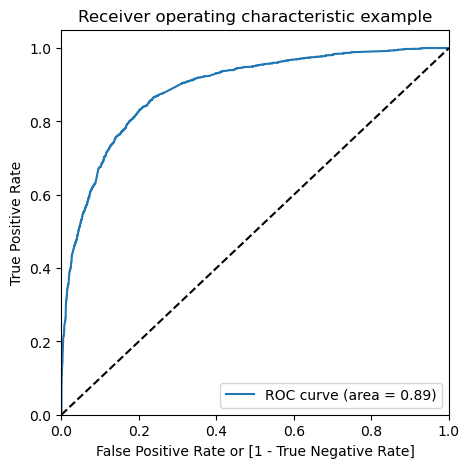

In [150]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Since we have higher (0.89) area under the ROC curve , therefore our model is a good one.

### Finding Optimal Cutoff Point
##### Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [151]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.190340,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.182265,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.245692,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.879184,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.735640,7987,1,1,1,1,1,1,1,1,1,0,0


In [152]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.602425  0.972608  0.370551
0.2   0.2  0.757991  0.912510  0.661204
0.3   0.3  0.803653  0.850368  0.774392
0.4   0.4  0.814990  0.780867  0.836364
0.5   0.5  0.817037  0.708095  0.885275
0.6   0.6  0.802866  0.607931  0.924968
0.7   0.7  0.787593  0.530253  0.948784
0.8   0.8  0.766966  0.440720  0.971319
0.9   0.9  0.726657  0.310303  0.987452


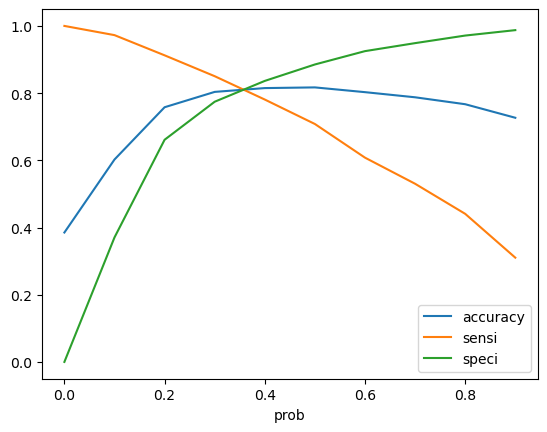

In [153]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [154]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.190340,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.182265,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.245692,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.879184,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.735640,7987,1,1,1,1,1,1,1,1,1,0,0,1


#### Assigning Lead Score to the Training data

In [155]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.190340,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.182265,1012,0,1,1,0,0,0,0,0,0,0,0,0,18
2,0,0.245692,9226,0,1,1,1,0,0,0,0,0,0,0,0,25
3,1,0.879184,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.735640,7987,1,1,1,1,1,1,1,1,1,0,0,1,74


#### Model Evaluation

In [156]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8107384663832468


In [157]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3129,  776],
       [ 426, 2020]], dtype=int64)

In [158]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [159]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8258381030253475


In [160]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8012804097311139


In [161]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.19871959026888605


In [162]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7224606580829757


In [163]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.880168776371308


### Precision and Recall
- Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
- Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [164]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3457,  448],
       [ 714, 1732]], dtype=int64)

In [165]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7944954128440367


In [166]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7080948487326247


###### Using sklearn utilities for the same

In [167]:
from sklearn.metrics import precision_score, recall_score

In [168]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7944954128440367


In [169]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7080948487326247


#### Precision and recall tradeoff

In [170]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [171]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

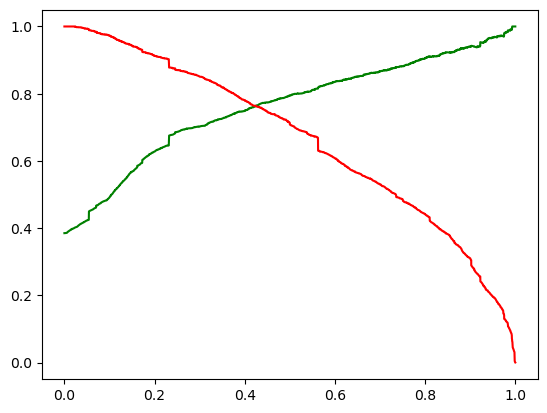

In [172]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

#### Scaling the test data

In [173]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [174]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,...,What is your current occupation_Working Professional,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,-0.600595,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1490,0,0,1.887326,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
7936,0,0,-0.752879,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4216,0,0,-0.888650,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3830,0,0,-0.587751,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [175]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.125140
1490    0.968592
7936    0.107938
4216    0.907712
3830    0.128132
1800    0.629834
6507    0.368758
4821    0.294592
4223    0.922305
4714    0.245692
dtype: float64

In [176]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [177]:
# Let's see the head
y_pred_1.head()

,0
3271,0.125140
1490,0.968592
7936,0.107938
4216,0.907712
3830,0.128132


In [178]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [179]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [180]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [181]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [182]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.125140
1,1,1490,0.968592
2,0,7936,0.107938
3,1,4216,0.907712
4,0,3830,0.128132


In [183]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [184]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [185]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.125140
1,1490,1,0.968592
2,7936,0,0.107938
3,4216,1,0.907712
4,3830,0,0.128132


In [186]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [187]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.125140,0
1,1490,1,0.968592,1
2,7936,0,0.107938,0
3,4216,1,0.907712,1
4,3830,0,0.128132,0


In [188]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8024237972824091


In [189]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1384,  350],
       [ 188,  801]], dtype=int64)

In [190]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [191]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8099089989888777


In [192]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.798154555940023


#### Assigning Lead Score to the Testing data

In [193]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.125140,0,13
1,1490,1,0.968592,1,97
2,7936,0,0.107938,0,11
3,4216,1,0.907712,1,91
4,3830,0,0.128132,0,13


### Observations:
#### After running the model on the Test Data , we obtain:

- Accuracy : 80.4 %
- Sensitivity : 80.4 %
- Specificity : 80.5 %

## Results :
### Comparing the values obtained for Train & Test:
- Train Data:
Accuracy : 81.0 %
Sensitivity : 81.7 %
Specificity : 80.6 %
- Test Data:
Accuracy : 80.4 %
Sensitivity : 80.4 %
Specificity : 80.5 %

#### Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

### Finding out the leads which should be contacted:

- The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [195]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.968592,1,97
3,4216,1,0.907712,1,91
8,4223,1,0.922305,1,92
16,1946,1,0.930419,1,93
21,2461,1,0.993561,1,99
...,...,...,...,...,...
2694,1566,1,0.946868,1,95
2699,6461,1,0.965583,1,97
2703,5741,1,0.918053,1,92
2715,6299,1,0.884556,1,88


#### So there are 368 leads which can be contacted and have a high chance of getting converted. 

In [196]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4216, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049,
       1518, 4543, 4830, 4365, 3542, 2504, 7674, 8596, 4003, 4963, 6947,
       4807,  446,  789, 8372, 5805, 3758, 1561,  737, 9034, 6423, 8286,
       7174, 4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297,
        200, 5490, 1995, 6532, 4498, 5797, 8687,  831, 7653,  572, 4149,
       2018, 6743, 3307, 3976, 5769, 1051, 1663, 3288, 8959, 7521, 8282,
       8213, 9063, 5292, 6913, 6015, 1481,  785, 3265, 3285, 7433, 2460,
       3858, 3810, 2009, 8106,  373, 3055, 7417, 4179, 8568, 7268, 4353,
       6784, 6754, 7236, 2960, 7753, 3983,  802, 8745, 4717,  505, 8509,
       6094, 4992, 7036, 2680, 7065,  112, 6149, 7157, 3827, 7175, 1675,
       6999, 5826, 8492, 6499, 2481, 3439, 4612, 7129, 4793, 1557, 4837,
       2495,  822, 2378, 5090, 5075, 7699, 5638, 2342, 8077, 2727,  720,
       7489, 2961, 1542, 5656, 2630, 6728, 8205, 6332, 8461, 2427, 5087,
        174, 2674, 8065, 2095, 1568, 8597, 4865, 35

In [197]:
res.params.sort_values(ascending=False)

Do Not Call                                             20.558372
Lead Source_Welingak Website                             5.849478
Lead Source_Reference                                    3.284662
What is your current occupation_Working Professional     2.626508
Last Activity_Other_Activity                             2.446136
Last Activity_SMS Sent                                   1.357556
Total Time Spent on Website                              1.098898
Lead Source_Olark Chat                                   1.061453
Last Activity_Email Opened                               0.911637
Last Notable Activity_Unsubscribed                       0.823297
Last Activity_Unreachable                                0.747665
Last Activity_Email Link Clicked                         0.687289
Last Activity_Page Visited on Website                    0.607650
const                                                    0.521770
What is your current occupation_Student                  0.431363
Last Activ

## Recommendations:
- The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.
- The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.
- The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.
- The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.
- The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.

- The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.

- The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.
- The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.
- The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.